# 선형회귀 (Logistic Regression)


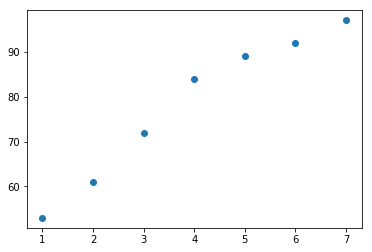

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 성적
scores = [53, 61,72, 84, 89, 92, 97]
# 공부한 시간
study_times = [1, 2,3, 4, 5, 6, 7]

plt.scatter(study_times, scores)
plt.show()


## 최소제곱법 (Least Square Method)

한 종류의 독립변수들로부터 변화 직선(1차함수의 예측선)을 구하는 방법

```
y = a * x + b
```
위 식에서 기울기 a와 y절편 b를 구하는 것

* 기울기 a = sum((x-mean(x)(y-mean(y)) / sum((x-mean(x))**2)
* y 절편 b = mean(y) - (mean(x) * a)

성적의 평균 78.28571428571429
공부한 시간의 평균 4.0
기울기 a의 분자 211.0
기울기 a의 분모 28.0
기울기 a  7.535714285714286
y 절편 b 48.14285714285715


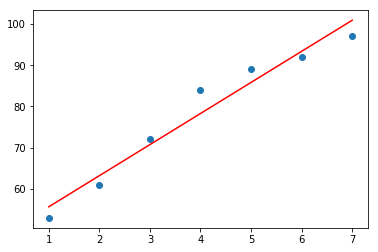

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 성적
scores = [53, 61,72, 84, 89, 92, 97]
# 공부한 시간
study_times = [1, 2,3, 4, 5, 6, 7]

# 성적의 평균
mean_scores = np.mean(scores)
print("성적의 평균", mean_scores)

# 공부한 시간의 평균
mean_study_times = np.mean(study_times)
print("공부한 시간의 평균", mean_study_times)

# 기울기 a를 구하기 위한 분자
dividend = 0
for i in range(len(scores)):
    dividend += (scores[i]-mean_scores) * (study_times[i]-mean_study_times)

print("기울기 a의 분자", dividend)

# 기울기 a의 분모
divisor = sum([(st -mean_study_times)**2 for st in study_times])
    
print("기울기 a의 분모", divisor)

# 기울기 a
a = dividend / divisor
print("기울기 a ", a)


# y 절편 b 
b = mean_scores - (mean_study_times * a)
print("y 절편 b", b)

# 성적 예측 값
predict_scores = []

for st in study_times:
    score = a * st + b
    predict_scores.append(score)


plt.scatter(study_times, scores)
plt.plot(study_times, predict_scores, color="r")
plt.plot()
plt.show()

## 평균 제곱근 오차 (Root Mean Squared Error)

여러 개의 종속변수들을 가지고 선형회귀(다중 선형회귀)할 경우, 임의의 기울기와 절편을 구한 후 오차를 반복적으로 수정해가며 정확한 선을 그리는 접근법이 필요한데, 이 경우 사용하는 오차 평가 알고리즘이 평균 제곱근 오차

* 오차 = 실제값 - 예측값
#### 오차의 합 = sum((실제값 - 예측값)**2)
#### 평균 제곱 오차(Mean Squared Error, MSE) = 오차의 합/예측값의 개수
#### 평균 제곱근 오차(Root Mean Squared Error, RMSE) = sqrt( sum((실제값 - 예측값)**2) / n )

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 실제 성적
scores = [53, 61,72, 84, 89, 92, 97]
# 공부한 시간
study_times = [1, 2,3, 4, 5, 6, 7]

# 임의의 예측 기울기 a와 절편 b 가정
a = 7
b = 45

#예측 함수
def predict(std_time):
    return a * std_time + b

# 각 공부 시간에 대한 성적 예측값
predict_scores = [predict(st) for st in study_times]

print("공부한 시간:", study_times)
print("성적 예측값:", predict_scores)
print("실제 성적: ", scores)

# 평균제곱근오차 함수
def rmse(predict_scores, real_scores):
    n = len(predict_scores)
    sum_squared_error = 0
    for i in range(n):
        sum_squared_error += (predict_scores[i] - real_scores[i])**2
    
    print("제곱 오차의 합:", sum_squared_error)
    
    mean_squared_error = sum_squared_error / n
    print("평균 제곱 오차:", mean_squared_error)
    
    root_mean_squared_error = np.sqrt(mean_squared_error)
    print("평균 제곱근 오차(rmse):", root_mean_squared_error)

rmse(predict_scores, scores)

공부한 시간: [1, 2, 3, 4, 5, 6, 7]
성적 예측값: [52, 59, 66, 73, 80, 87, 94]
실제 성적:  [53, 61, 72, 84, 89, 92, 97]
제곱 오차의 합: 277
평균 제곱 오차: 39.57142857142857
평균 제곱근 오차(rmse): 6.29058253037257
